# Vitals & Sanity Check

**This step isn't analysis; it's data cleaning. 80% of data analysis is cleaning. This is where you find the dirt.**

In [1]:
from src.io_utils import load_data

df = load_data("data/health_study_dataset.csv")

print(df.head())



   id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0   1   57   F   168.9    65.8        141.8         4.58     No        0
1   2   47   M   180.4    95.9        144.8         5.18    Yes        0
2   3   59   F   169.9    82.2        151.7         6.16     No        0
3   4   72   M   157.7    93.1        151.0         6.63     No        0
4   5   46   M   192.6   104.1        144.1         5.21     No        0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB


In [3]:
print(df['sex'].unique())
print(df['smoker'].unique())

['F' 'M']
['No' 'Yes']


In [4]:
df.describe()

,id,age,height,weight,systolic_bp,cholesterol,disease
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,49.426250,171.849250,73.413000,149.178625,4.929150,0.058750
std,231.0844,14.501118,9.804259,13.685059,12.793360,0.848413,0.235303
min,1.0000,18.000000,144.400000,33.700000,106.800000,2.500000,0.000000
25%,200.7500,39.000000,164.775000,64.800000,140.900000,4.327500,0.000000
50%,400.5000,50.000000,171.350000,73.200000,149.400000,4.970000,0.000000
75%,600.2500,59.000000,178.925000,82.600000,157.600000,5.482500,0.000000
max,800.0000,90.000000,200.400000,114.400000,185.900000,7.880000,1.000000


df.describe tells me 
- if the data is symmetrical: mean and median values are pretty close to each other for every column, so I can say that the data is symmetrical.
- std (Standard Deviation): This is a statistical measure of how "spread out" the data is. A low std means the data is tightly clustered around the mean.
- The Range (min and max): You've already checked this. Your min and max are reasonable, so your data isn't that "messy."

The "reference number" you use to judge your std is the mean of that same column. You have to ask, "How big is the standard deviation compared to the average?"

Low std: The std is a small fraction of the mean. This means the data is tightly clustered.

High std: The std is a large fraction of the mean. This means the data is very spread out.

In [5]:
from src.analysis import get_descriptive_stats

descriptive_stats = get_descriptive_stats(df)

print(descriptive_stats)


              age      weight      height  systolic_bp  cholesterol
count  800.000000  800.000000  800.000000   800.000000   800.000000
mean    49.426250   73.413000  171.849250   149.178625     4.929150
std     14.501118   13.685059    9.804259    12.793360     0.848413
min     18.000000   33.700000  144.400000   106.800000     2.500000
25%     39.000000   64.800000  164.775000   140.900000     4.327500
50%     50.000000   73.200000  171.350000   149.400000     4.970000
75%     59.000000   82.600000  178.925000   157.600000     5.482500
max     90.000000  114.400000  200.400000   185.900000     7.880000


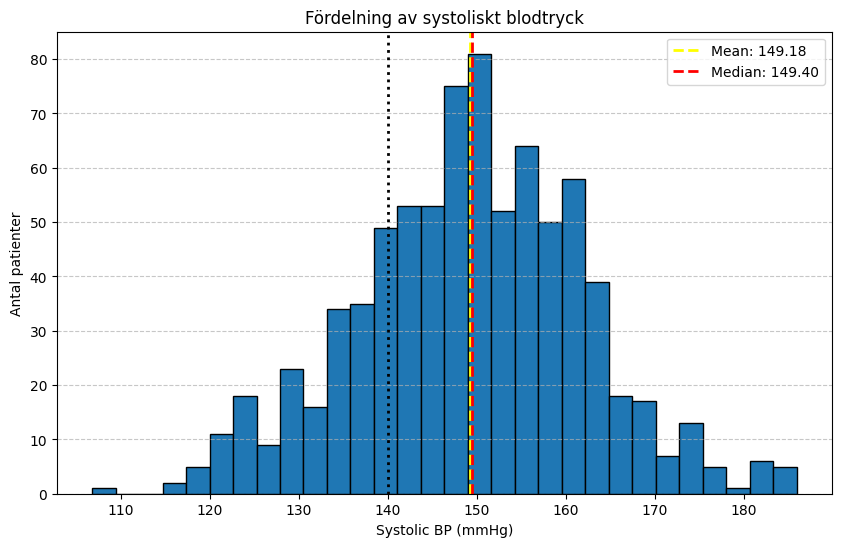

In [6]:
from src.viz import plot_bp_histogram

plot_bp_histogram(df)


In [7]:
total_patients = len(df)

# 2. Count how many patients have BP > 140
high_bp_count = df[df['systolic_bp'] > 140].shape[0]

# 3. Calculate the percentage
percentage_high_bp = (high_bp_count / total_patients) * 100

print(f"Total number of patients: {total_patients}")
print(f"Number of patients with high BP (> 140): {high_bp_count}")
print(f"Percentage with high BP: {percentage_high_bp:.2f}%")

Total number of patients: 800
Number of patients with high BP (> 140): 615
Percentage with high BP: 76.88%


<Figure size 800x600 with 0 Axes>

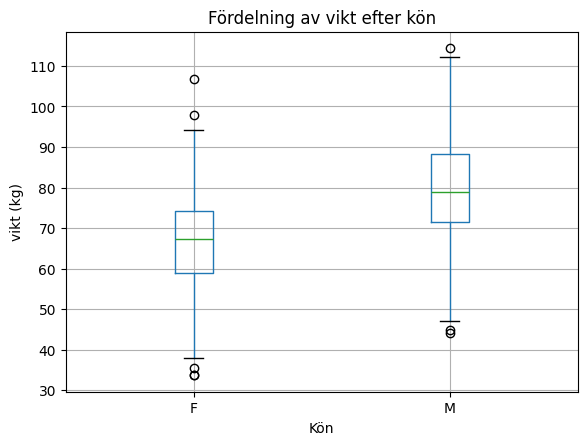

In [8]:
from src.viz import plot_weight_boxplot

# 'df' should already be loaded from a previous cell
plot_weight_boxplot(df)

# Stapel diagram över andelen rökare

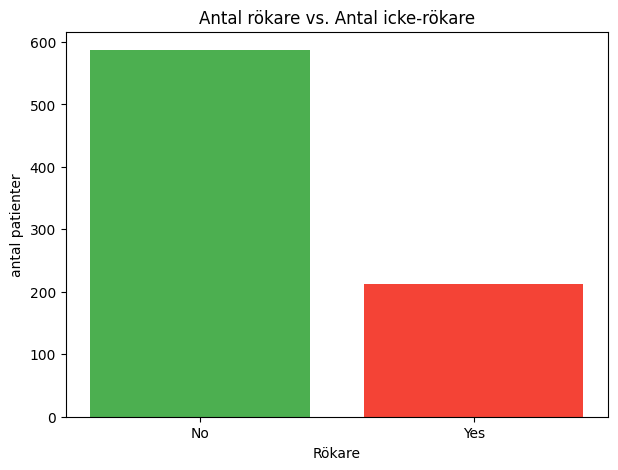

In [9]:
from src.viz import plot_smoker_bar_chart

plot_smoker_bar_chart(df)